## Bike sharing demand prediction  - Multilinear Regression Model Case Study

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

### Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a <b> price or free </b>. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various <b> meteorological surveys and people's styles </b> , the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Business Goal: 

You are required to model the <b> demand for shared bikes with the available independent variables </b>. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to <b> convert such feature values into categorical string values </b> before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the <b>column 'yr' might be a good variable for prediction</b>. So think twice before dropping it. 

### Model Building

In the dataset provided, you will notice that there are <b>three columns named 'casual', 'registered', and 'cnt'</b>. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this <b>'cnt' as the target variable</b>.



## Case Study Objective and scope  

The primary Objective of the case study is to understand how and why the factors (variables)in the provided data set influences the demand for bike sharing in the American market. The study should enable the company to -

* Identify the signifant variables affecting the demand for shared bikes
* Create a quantitative model that can help in predicting the demand for shared bikes 
* How well those variables describe the bike demands i.e. to know the accuracy of the model, how well these variables can predict demand for shared bikes 

The following steps are followed -

1. Reading the data 
2. Understanding the data
3. Visualizing the Data
4. Data Preparing for modelling
    * Dropping unwanted columns
    * Co-relation checks 
    * Dummy variables creation, 
    * Splitting data into Training and Test Sets
    * Rescaling of numerical variables
    * Dividing data into X & Y sets for model building
5. Building the model using RFE & Training the model iteratively
6. Residual analysis of the training data
7. Prediction and evaluation on the test set
8. Final Evaluation

### Step 1: Reading the Data
Let us first import NumPy, Pandas, seaborn, matplotlib, plotly and read the bikes dataset

In [1]:
# Import all the libraries required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

#Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file into a dataframe and display the data set
bikes = pd.read_csv("day.csv")
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Step 2: Understanding the data

In [3]:
# Display data set shape (rows and columns)
bikes.shape

(730, 16)

In [4]:
bikes.describe()
# besides dteday, all key columns seem to be in the numerical format

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
# Computing the data range between min and max
min_val = bikes.describe().loc['min']
max_val = bikes.describe().loc['max']

# max_val - min_val
range_val = max_val - min_val
range_val

instant        729.000000
season           3.000000
yr               1.000000
mnth            11.000000
holiday          1.000000
weekday          6.000000
workingday       1.000000
weathersit       2.000000
temp            32.904001
atemp           38.091320
hum             97.250000
windspeed       32.499777
casual        3408.000000
registered    6926.000000
cnt           8692.000000
dtype: float64

In [6]:
# Quartile deviation

q1 = bikes.describe().loc['25%']
q3 = bikes.describe().loc['75%']

InterQuartile_deviation = (q3 - q1)
InterQuartile_deviation

instant        364.500000
season           1.000000
yr               1.000000
mnth             6.000000
holiday          0.000000
weekday          4.000000
workingday       1.000000
weathersit       1.000000
temp            13.068729
atemp           13.556062
hum             20.989575
windspeed        6.583939
casual         780.250000
registered    2281.000000
cnt           2796.250000
dtype: float64

In [7]:
# Outliers - Since we have a small data set, we will not remove the outliers from the
# data set.
bikes[bikes["temp"] > bikes["temp"].quantile(0.99)]

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
202      203  22-07-2018       3   0     7        0        5           1   
203      204  23-07-2018       3   0     7        0        6           0   
204      205  24-07-2018       3   0     7        0        0           0   
209      210  29-07-2018       3   0     7        0        5           1   
544      545  29-06-2019       3   1     6        0        5           1   
550      551  05-07-2019       3   1     7        0        4           1   
551      552  06-07-2019       3   1     7        0        5           1   
552      553  07-07-2019       3   1     7        0        6           0   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
202           1  34.781653  42.04480  58.0417   8.917700     562        2825   
203           1  34.815847  40.21435  50.0000   8.791807     987        2298   
204           1  34.030000  39.74145  55.0833  11.334457    1050        2556   
209           1  34.371653  39.29835  54.2500  11.667246     670        3176   
544           1  34.200847  39.33065  48.8750  11.082939     829        4634   
550           1  33.927500  38.06835  45.7917  12.999943    1405        4836   
551           1  33.961653  37.62665  45.0833   9.791514    1366        4841   
552           1  35.328347  40.24565  49.2083  10.958118    1448        3392   

      cnt  
202  3387  
203  3285  
204  3606  
209  3846  
544  5463  
550  6241  
551  6207  
552  4840

In [8]:
# Check for any data analmolies. None observed and hence no data 
# imputation/corrections are required at this stage.

bikes['season'].value_counts()
#bikes['yr'].value_counts()
#bikes['mnth'].value_counts()
#bikes['holiday'].value_counts()
#bikes['weekday'].value_counts()
#bikes['workingday'].value_counts()
#bikes['weathersit'].value_counts()
#bikes['temp'].value_counts()
#bikes['atemp'].value_counts()
#bikes['hum'].value_counts()
#bikes['mnth'].value_counts()
#bikes['windspeed'].value_counts()
#bikes['casual'].value_counts()
#bikes['registered'].value_counts()
#bikes['cnt'].value_counts()
#bikes['dteday'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
# check for null values.
bikes.isna().sum()/bikes.shape[0]*100

# No null values observed

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
# Display data types and non-null count of the columns.
bikes.info()

# there are no null or missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
#Duplicate checks
# Identify duplicate instant records in the data set
bikes['instant'].nunique()

# Results: All instants are unique (730 of 730 ). It can be infered that
# there are no duplicate records currently in the data set which needs to be merged

730

##### Observations
* There are 730 rows and 16 columns. 
* There are no null/missing values in the given data set
* There are no duplicates in the data set that requires record merging.
* Also there are no junk values in the data set
* Except for dteday all columns are numerical (integer or float)
* The following columns are continuous numericals -
    - instant
    - dteday
    - temp
    - atemp
    - hum
    - windspeed 
* The following columns are categorical but already converted to numerical values -
    - season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    - weathersit
* The following variables seem like demand variables -
    - casual
    - registered
    - cnt (total demand, our target variable)

### Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

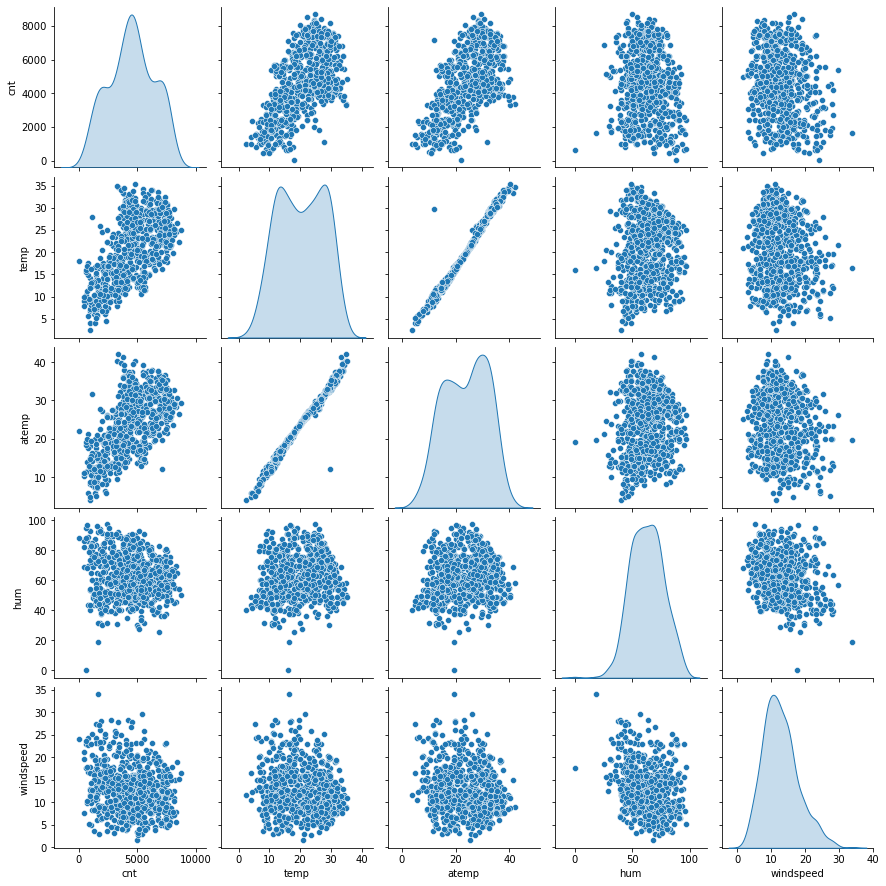

In [12]:
sns.pairplot(bikes[['cnt','temp','atemp','hum','windspeed']], diag_kind='kde')
plt.show()

##### Observations -
 * There seems to be a linear relation between temp, atemp with cnt
 * hum and windspeed don't seem to have a linear relation with cnt
 * temp and atemp seems to have a strong linear relationship (indicating possible multicollinearity)
 * cnt and hum seems to be normally distributed
 * temp and atemp seems to have a bimodal distibution (dip/hump in the middle)
 * windspeed seems to the slightly right skewed (tail to the left)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

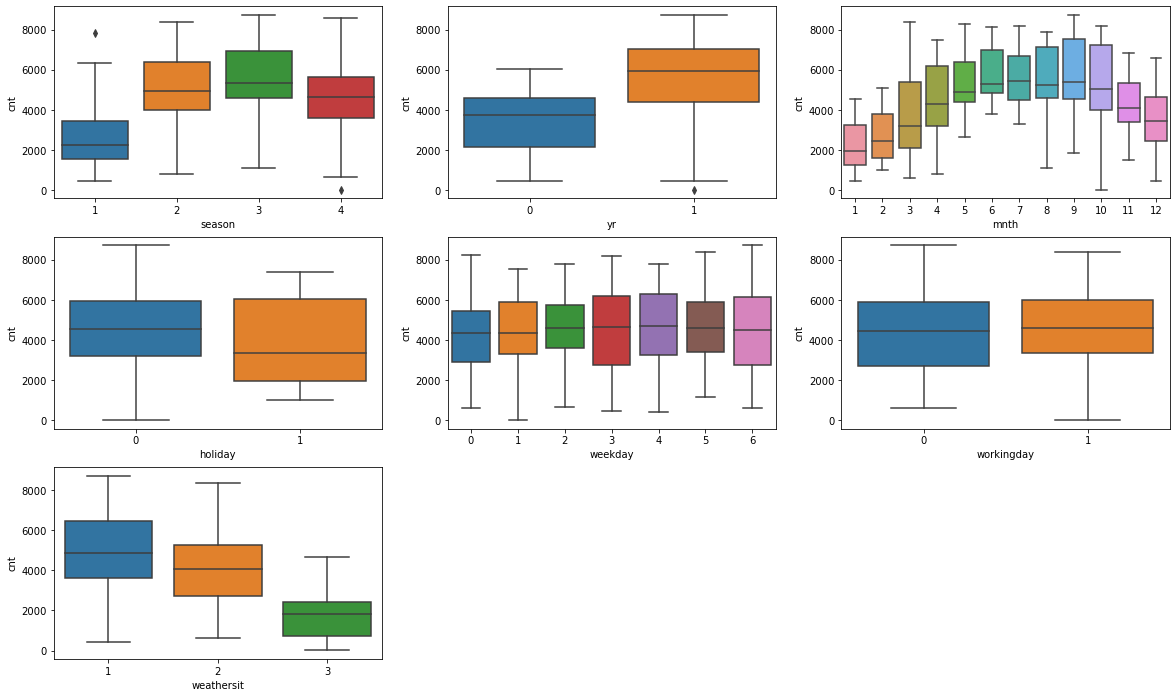

In [13]:
# box plots
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

In [14]:
# Demand(cnt) % across some of the independent categorical variables

print( '\n Demand % across seasons: \n',(bikes.groupby(['season']).cnt.sum()/bikes.cnt.sum())*100 )
print( '\n Demand % across yr: \n',(bikes.groupby(['yr']).cnt.sum()/bikes.cnt.sum())*100 )
print( '\n Demand % across mnth: \n',(bikes.groupby(['mnth']).cnt.sum()/bikes.cnt.sum())*100 )
print( '\n Demand % across holiday: \n',(bikes.groupby(['holiday']).cnt.sum()/bikes.cnt.sum())*100 )
print( '\n Demand % across weekday: \n',(bikes.groupby(['weekday']).cnt.sum()/bikes.cnt.sum())*100 )
print( '\n Demand % across workingday: \n',(bikes.groupby(['workingday']).cnt.sum()/bikes.cnt.sum())*100 )
print( '\n Demand % across weathersit: \n',(bikes.groupby(['weathersit']).cnt.sum()/bikes.cnt.sum())*100 )


 Demand % across seasons: 
 season
1    14.267278
2    27.913469
3    32.244879
4    25.574374
Name: cnt, dtype: float64

 Demand % across yr: 
 yr
0    37.774584
1    62.225416
Name: cnt, dtype: float64

 Demand % across mnth: 
 mnth
1      4.100254
2      4.543453
3      6.956268
4      8.177049
5     10.079053
6     10.524409
7     10.482049
8     10.671849
9     10.513743
10     9.795417
11     7.743634
12     6.412821
Name: cnt, dtype: float64

 Demand % across holiday: 
 holiday
0    97.61657
1     2.38343
Name: cnt, dtype: float64

 Demand % across weekday: 
 weekday
0    13.492796
1    13.841521
2    14.254971
3    14.318936
4    14.749859
5    14.822637
6    14.519280
Name: cnt, dtype: float64

 Demand % across workingday: 
 workingday
0    30.395506
1    69.604494
Name: cnt, dtype: float64

 Demand % across weathersit: 
 weathersit
1    68.613137
2    30.236125
3     1.150738
Name: cnt, dtype: float64


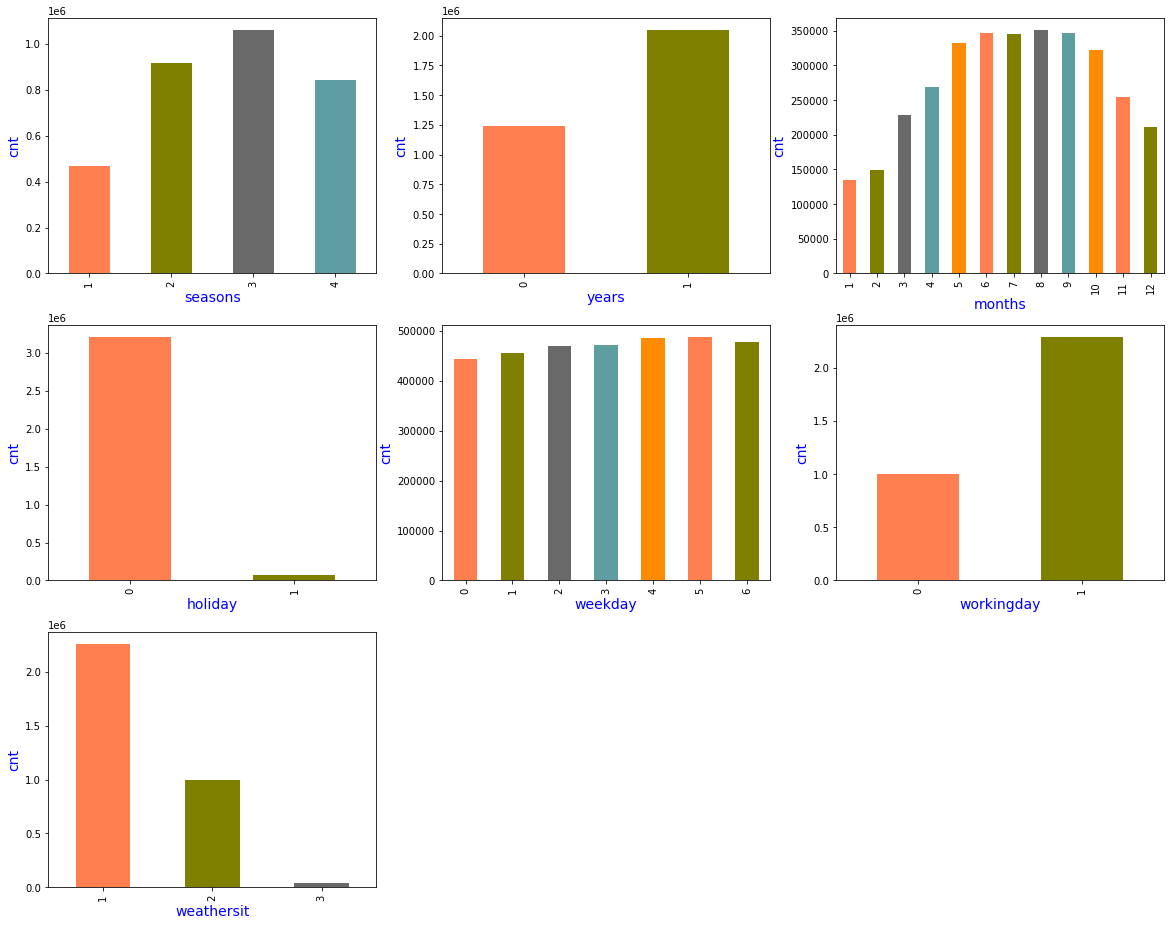

In [111]:
#bar charts depicting demand (cnt) across various categorical variables

plt.figure(figsize=(20, 16))
plt.title("Demand across categories",fontsize=14,color='b')
c = ['coral', 'olive', 'dimgrey', 'cadetblue', 'darkorange']

plt.subplot(3,3,1)
bikes.groupby(['season']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('season','cnt',data=bikes,palette='Set1')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('seasons',fontsize=14,color = 'b')      
#plt.title("Demand across seasons",fontsize=14,color='b')

plt.subplot(3,3,2)
bikes.groupby(['yr']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('yr','cnt',data=bikes, hue='yr',palette='Set2')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('years',fontsize=14,color = 'b')      
#plt.title("Demand across yrs",fontsize=14,color='b')

plt.subplot(3,3,3)
bikes.groupby(['mnth']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('mnth','cnt',data=bikes,palette='Set1')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('months',fontsize=14,color = 'b')      
#plt.title("Demand across months",fontsize=14,color='b')

plt.subplot(3,3,4)
bikes.groupby(['holiday']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('holiday','cnt',data=bikes, hue='yr',palette='Set2')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('holiday',fontsize=14,color = 'b')      
#plt.title("Demand across holiday",fontsize=14,color='b')

plt.subplot(3,3,5)
bikes.groupby(['weekday']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('weekday','cnt',data=bikes, hue='yr',palette='Set1')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('weekday',fontsize=14,color = 'b')      
#plt.title("Demand across weekday",fontsize=14,color='b')

plt.subplot(3,3,6)
bikes.groupby(['workingday']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('workingday','cnt',data=bikes, hue='yr',palette='Set2')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('workingday',fontsize=14,color = 'b')      
#plt.title("Demand across workingday",fontsize=14,color='b')

plt.subplot(3,3,7)
bikes.groupby(['weathersit']).cnt.sum().plot(kind='bar',color = c)
#sns.barplot('season','cnt',data=bikes, hue='yr',palette='Set1')
plt.ylabel('cnt',fontsize=14,color='b')
plt.xlabel('weathersit',fontsize=14,color = 'b')      
#.title("Demand across weathersit",fontsize=14,color='b')

plt.show()

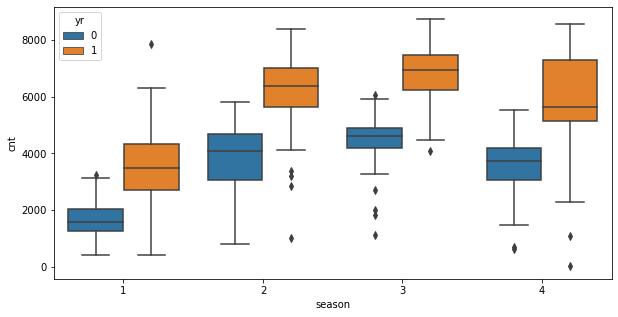

In [16]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bikes)
plt.show()

In [17]:
# bar chart using plotly depicting demand (cnt) across various categorical variables 
# with respect to years (hue)

fig = px.bar(bikes, x="season", y="cnt",color="yr", hover_data=['yr'],barmode = 'group') 
fig.show()
#plt.title("Demand across seasons and Year",fontsize=14,color='b')

fig = px.bar(bikes, x="mnth", y="cnt",color="yr", hover_data=['yr'],barmode = 'group') 
fig.show()
#plt.title("Demand across months and Year",fontsize=14,color='b')

fig = px.bar(bikes, x="holiday", y="cnt",color="yr", hover_data=['yr'],barmode = 'group') 
fig.show()
#plt.title("Demand across holidays and Year",fontsize=14,color='b')

fig = px.bar(bikes, x="weekday", y="cnt",color="yr", hover_data=['yr'],barmode = 'group') 
fig.show()
#plt.title("Demand across weekdays and Year",fontsize=14,color='b')

fig = px.bar(bikes, x="workingday", y="cnt",color="yr", hover_data=['yr'],barmode = 'group') 
fig.show()
#plt.title("Demand across workingdays and Year",fontsize=14,color='b')

fig = px.bar(bikes, x="weathersit", y="cnt",color="yr", hover_data=['yr'],barmode = 'group') 
fig.show()
#plt.title("Demand across weather situation and Year",fontsize=14,color='b')


##### Observations

* season: season3 had the max demand among all seasons at approx 32% of the demand. The median was approx 5000 booking (across 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

* years: Almost 62% of the bike booking were happened in the second year. In comparsion to the previous year there is an approx 24% increase in demand. This would imply there is growing trend in demand for shared bikes over the last two years.

* mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

* weathersit: Almost 69% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings and can be a good predictor for the dependent variable.

* holiday: Almost 98% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday may not be a good predictor for the dependent variable.

* weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. We will let the model decide if this needs to be added or not.

* workingday: Almost 70% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Step 4: Data Preperation

- In general the data set already has all numerical values. Hence there is no need to convert strings to numerical in this case.
- However, We may need to convert some of the categorical variables to dummy variables
- We could drop columns that are not required based on our business objectives and scope

### Dropping Unwanted Columns - 
The following varaibles can be dropped from further analysis -
* instant - since this is only a unique index column and not relevant to our analysis anymore
* dteday - since we already have the yr, mnth and weekday variables represented in the data set
* casual and registered  -  since they seems like a target variable split across the two customer categories. However our scope is limited to the cummulative target count 'cnt'



In [18]:
#dropping unwanted columns and assigning it to a new dataset
bikes_v1 = bikes.drop(['instant','dteday','casual','registered'], axis = 1)

In [19]:
bikes_v1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

#### Check of Correlation

Now let’s look at the correlation between all the remaining numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [20]:
# Let's check how these variables are correlated
bikes_v1.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.067534  
workingday  0.062542  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

<AxesSubplot:>

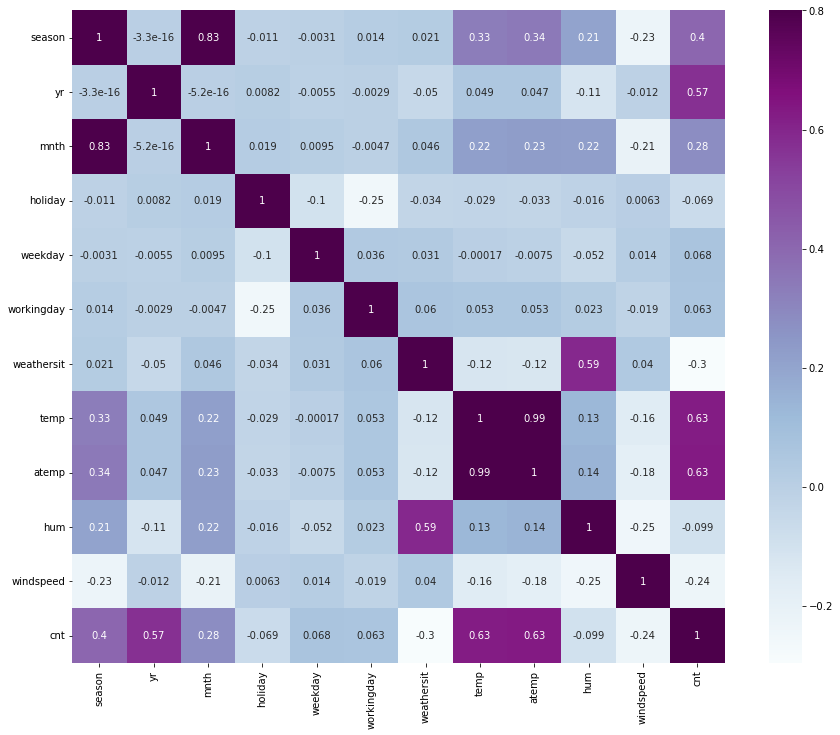

In [21]:
# Lets plot a correlation heat map
matrix = bikes_v1.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap= 'BuPu', annot = True)

##### Observations:

 * There is a good positive correlation between target variable (cnt) -
   * Cnt and temp (0.63)
   * Cnt and atemp (0.63)
   * Cnt and yr (0.57) 
   * Cnt and season (0.40)
   
 * There is a strong positive correlation between the independent variables and potential candidates for multicollinearlity -
   * temp and atemp (0.99)
   * season and mnth (0.83)
   * hum and wathersit (0.59) 
   

### Dummy Variables Creation

These categorical variables have multiple levels (more than 2) -  
 * season - has 4 levels (1,2,3,4). 
 * mnth - has 12 levels (1 to 12)
 * weekday - has 7 levels (0 to 6)
 * weathersit - has 3levels (1,2,3)

For these, we will - 
 * Create equivalent dummy variables.
 * Drop the first dummy variable from the set of dummies created.
 * Drop the original variable for which the dummies were created.

Creating the dummy variables directly will result in all the variables being represented as numbers.   
This will make it difficult to distingush the category types e.g. seasons from months.  
Hence we will first convert these variables into explicit 'category' 
data types from it's current form and then convert it to dummy variables.


In [22]:
# Current datatypes in the dataset

bikes_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [23]:
# Converting to 'category' data types

bikes_v1['season'] = bikes_v1['season'].astype('category')
bikes_v1['mnth'] = bikes_v1['mnth'].astype('category')
bikes_v1['weekday'] = bikes_v1['weekday'].astype('category')
bikes_v1['weathersit'] = bikes_v1['weathersit'].astype('category')

In [24]:
# Datatypes after the conversion

bikes_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [25]:
# creating dummy variables and assiging it to new dataset

bikes_v2 = pd.get_dummies(bikes_v1, drop_first = True)
bikes_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

#### Check of Correlation

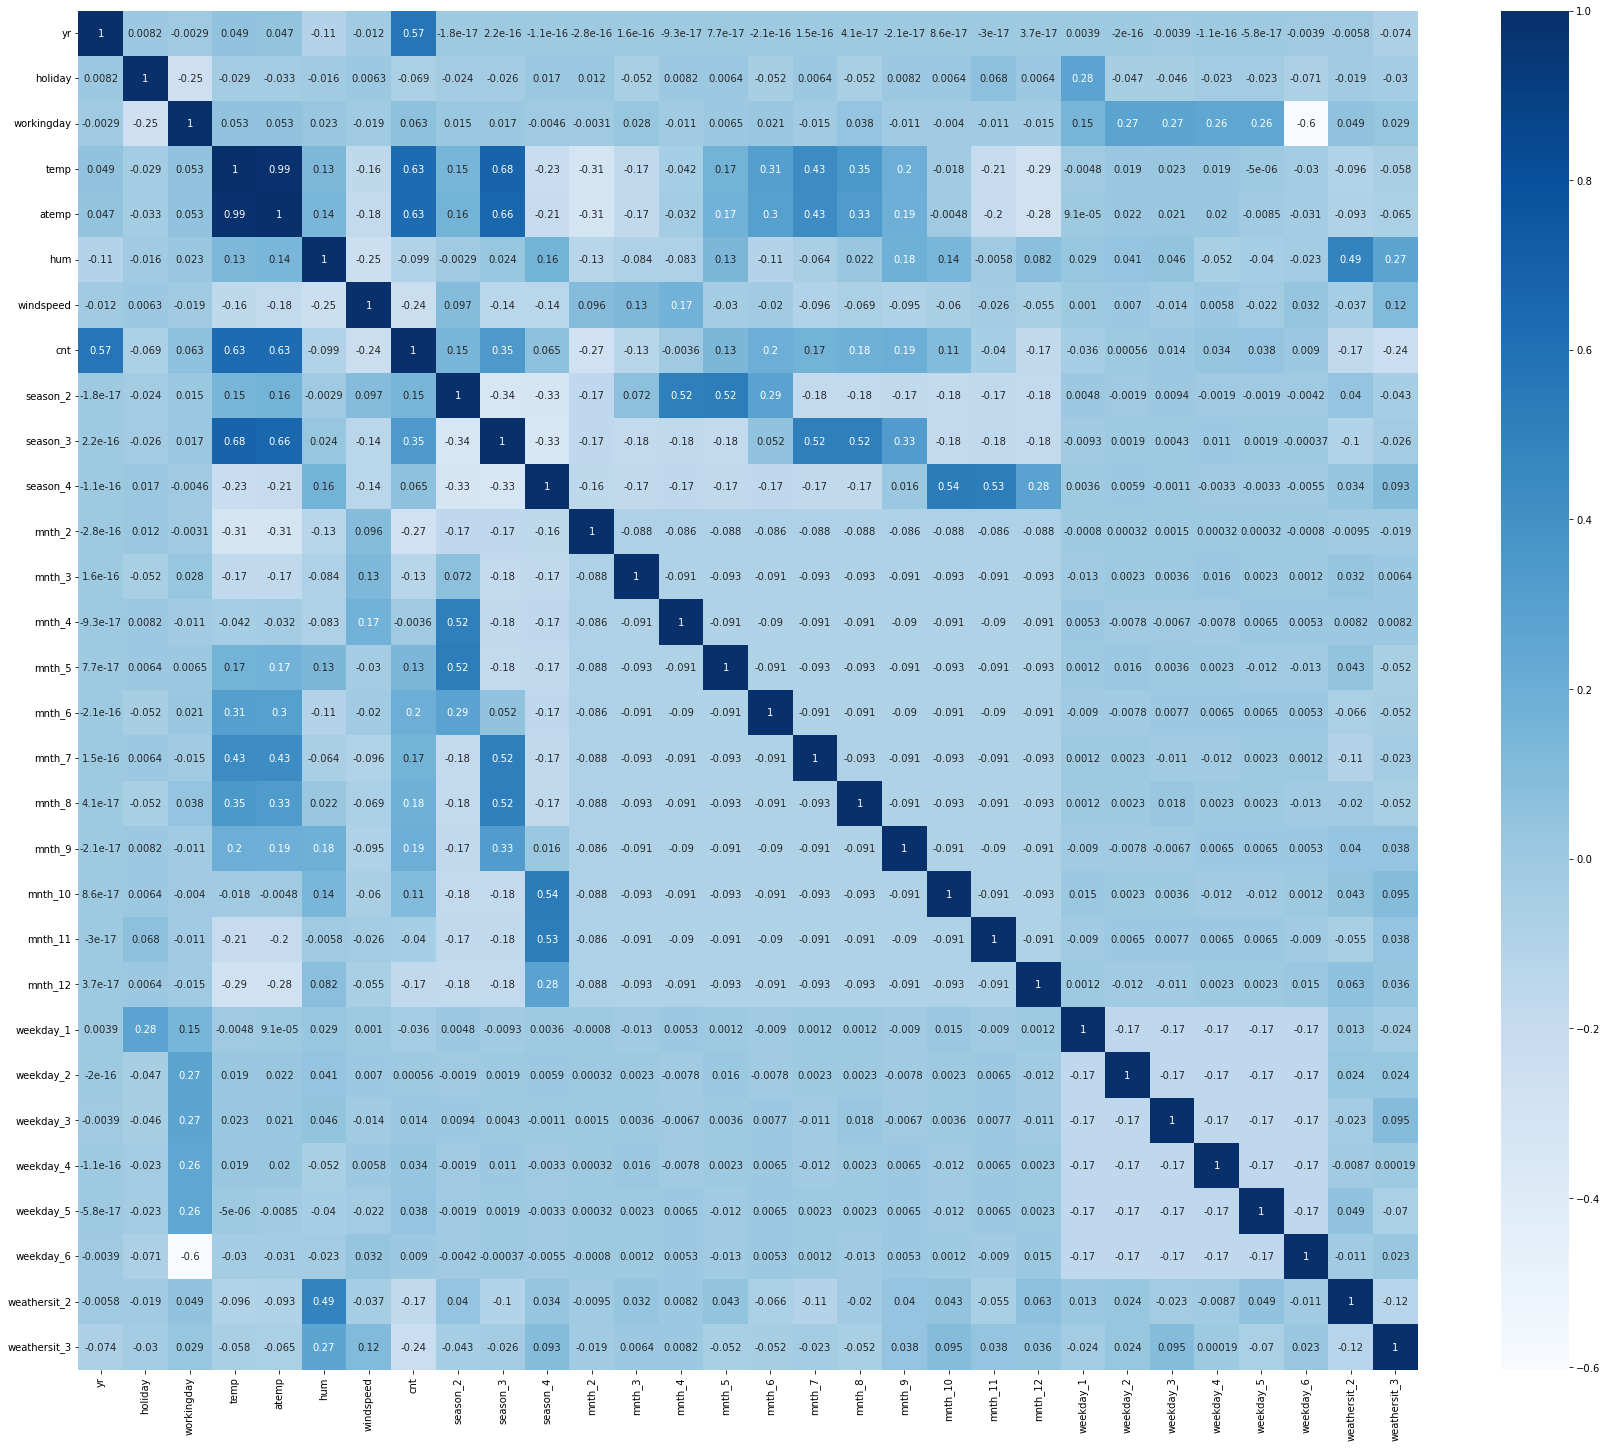

In [26]:
# Let's re-check how these variables are correlated on the 
# revised data set

plt.figure(figsize = (30,25))
sns.heatmap(bikes_v2.corr(), annot = True, cmap="Blues")
plt.show()


##### Observations:

 * The data indicates a good positive correlation between target variable (cnt) and the following dependent variables-
   * Cnt and temp (0.63)
   * Cnt and atemp (0.63)
   * Cnt and yr (0.57) 
   * Cnt and season_3 (0.35)
     
   
 * There is a strong positive correlation between the independent variables and potential candidates for multicollinearity -
   * temp and atemp (0.99)
   * temp and season_3 (0.68)
   * temp and season_3 (0.66)
   * season_2 and mnth_4 (0.52)
   * season_2 and mnth_5 (0.52)
   * season_3 and mnth_7 (0.52)
   * season_3 and mnth_8 (0.52)
   * season_4 and mnth_10 (0.54)
   * season_4 and mnth_11 (0.53)
   * hum and wathersit_2 (0.49) 

### Splitting the Data into Training and Testing Sets

We will now split the data set into train and test data in a 70:30 ratio respectively.

In [27]:
from sklearn.model_selection import train_test_split

# We specify random_state so that the train and test data set always 
# have the same set of rows across different executions, respectively

df_train, df_test = train_test_split(bikes_v2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.shape

(219, 30)

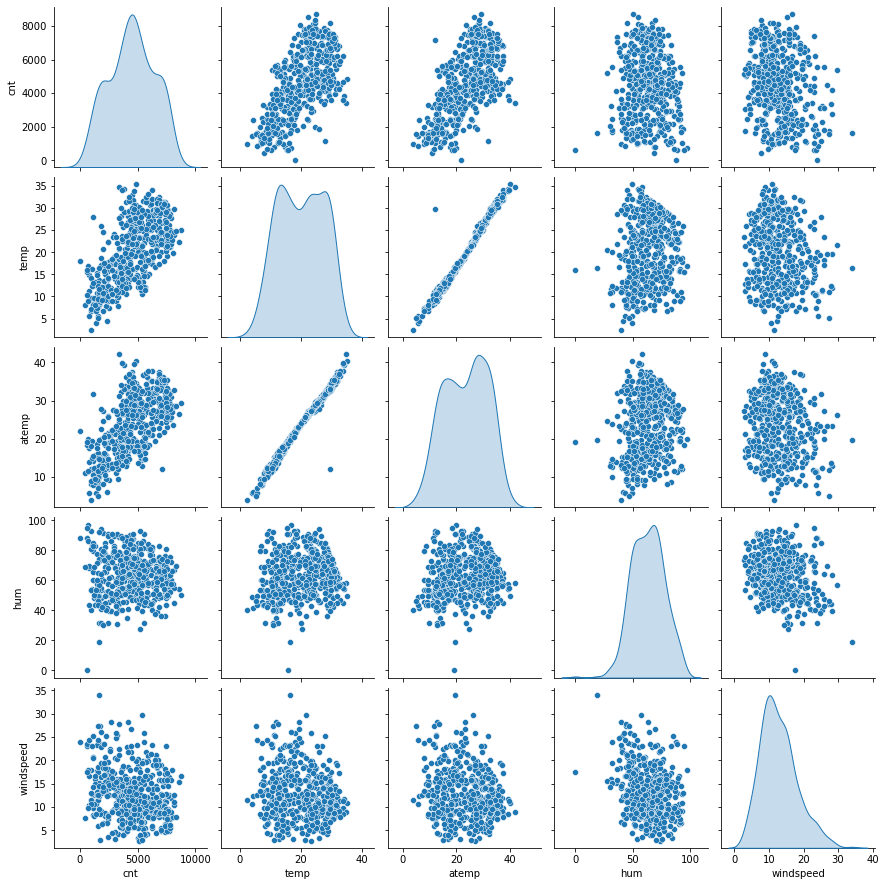

In [30]:
# Visualise the numeric values from the train data set

sns.pairplot(df_train[['cnt','temp','atemp','hum','windspeed']],diag_kind='kde')
plt.show()

#### Observations -

The training data seems to have a similar characteritics as the base pupulation data we analysed in the earlier section i.e.
 * There seems to be a linear relation between temp, atemp with cnt
 * hum and windspeed don't seem to have a linear relation with cnt
 * temp and atemp seems to have a strong linear relationship
 * cnt and hum seems to be normally distributed
 * temp and atemp seems to have a hump in the distibution (bimodal distribution)
 * windspeed seems to the slightly left skewed


### Rescaling the Features (Training Dataset)

Scaling doesn't impact the model. However, it is extremely important to rescale the numerical variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.There are two common ways of rescaling:

1. Min-Max scaling : Between 0 and 1 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [31]:
# importing the scaler function/method
from sklearn.preprocessing import MinMaxScaler

In [32]:
#Instantiate a scaler object
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the numeric variables except the binary 'yes-no' and 'dummy' categorical variables
num_vars = ['cnt','temp','atemp','hum','windspeed']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653  0.864243         0         0  ...        0        0          0   
576  0.827658         0         1  ...        0        0          0   
426  0.465255         0         0  ...        0        0          0   
728  0.204096         0         0  ...        0        1          0   
482  0.482973         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          1          0          0          0          0             0   
576          1          0          0          0          0             0   
426          0          0          0          0          1             1   
728          0          0          0          0          0             0   
482          0          0          0          0          1             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 30 columns]

In [35]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.086275   
std      0.169797    0.224593    0.430568    0.440557  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.150980    0.131373    0.158824    0.133333    0.127451   
std      0.278131    0.358381    0.338139    0.365870    0.340268    0.333805   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.154902      0.343137      0.029412  
std      0.362166      0.475223      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

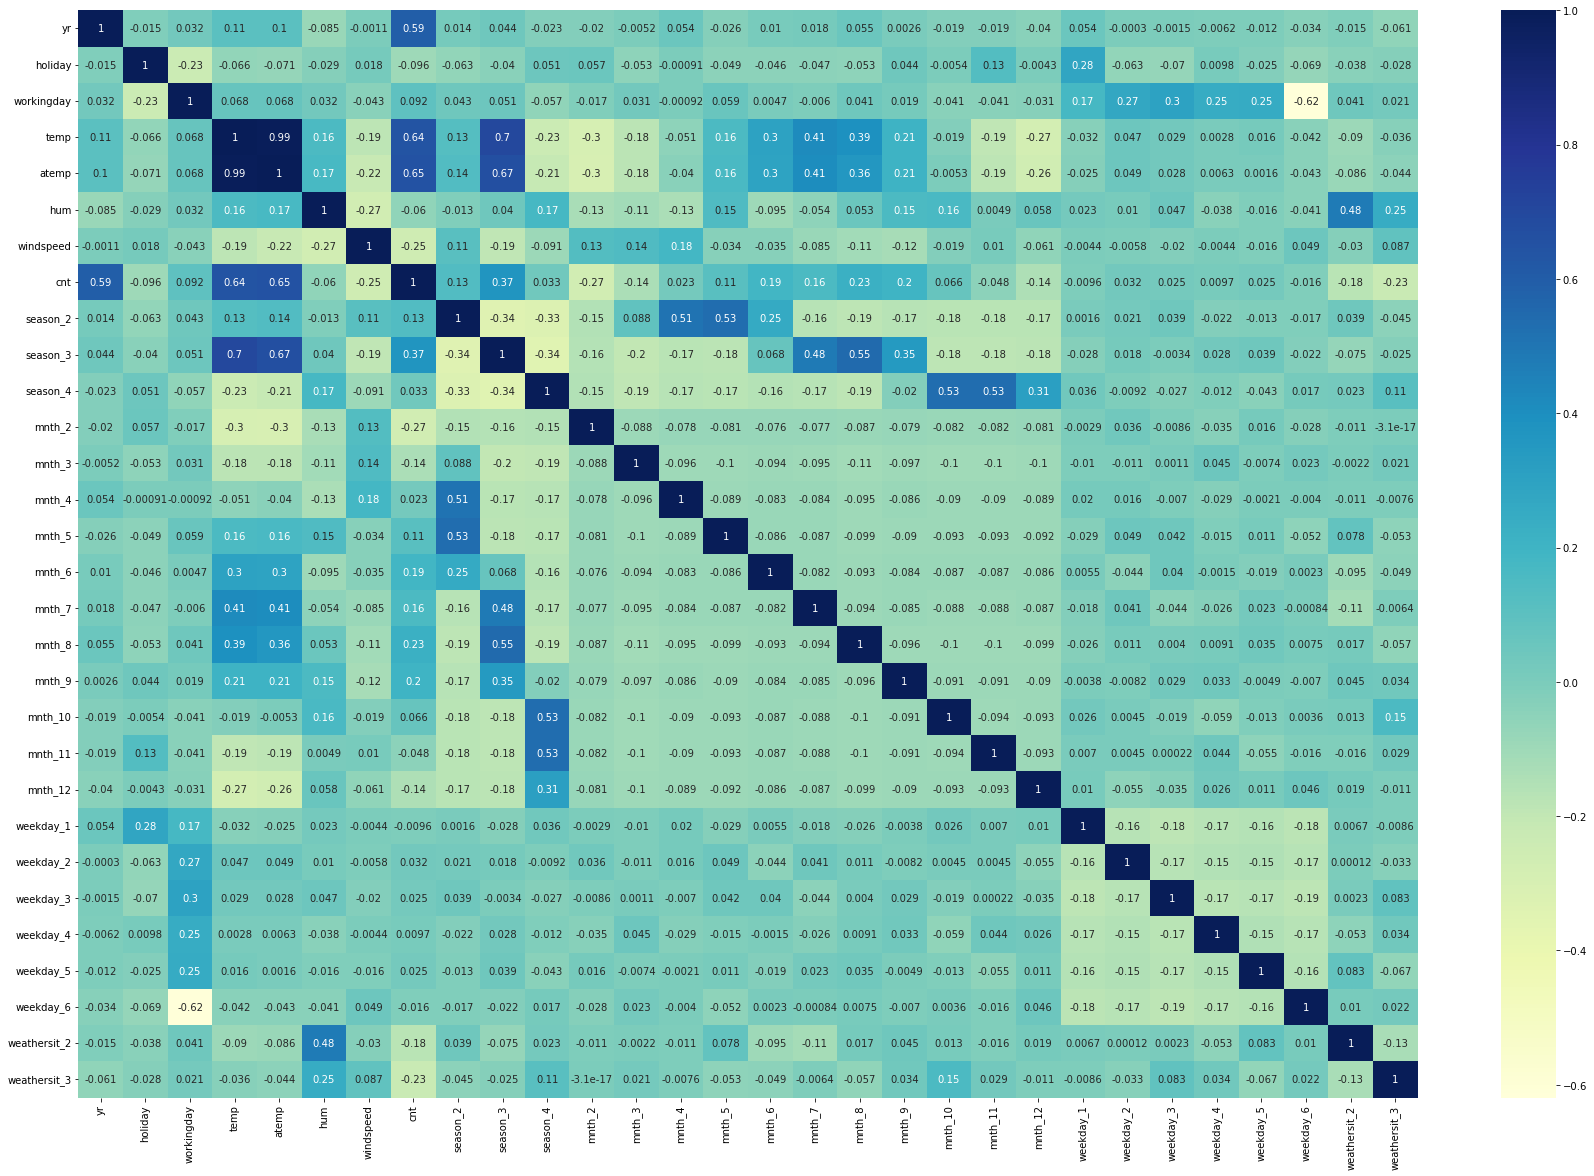

In [36]:
# Let's recheck the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Observations:

 * The data indicates a good positive correlation between target variable (cnt) and the following dependent variables-
   * Cnt and temp (0.64)
   * Cnt and atemp (0.65)
   * Cnt and yr (0.59) 
   * Cnt and season_3 (0.37)
     
   
 * There is a strong positive correlation between the independent variables and potential candidates for multicollinearlity -
   * temp and atemp (0.99)
   * temp and season_3 (0.70)
   * temp and season_3 (0.67)
   * season_2 and mnth_4 (0.51)
   * season_2 and mnth_5 (0.53)
   * season_3 and mnth_7 (0.48)
   * season_3 and mnth_8 (0.55)
   * season_4 and mnth_10 (0.53)
   * season_4 and mnth_11 (0.53)
   * hum and weathersit_2 (0.48)

### Dividing into X and Y sets for the model building

In [37]:
# Dividing the data, removes the cnt variable from X_train
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [39]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
653         0         0         1  ...        0        0          0   
576         0         1         0  ...        0        0          0   
426         0         0         0  ...        0        0          0   
728         0         0         0  ...        0        1          0   
482         1         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          1          0          0          0          0             0   
576          1          0          0          0          0             0   
426          0          0          0          0          1             1   
728          0          0          0          0          0             0   
482          0          0          0          0          1             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 29 columns]

## Step 5: Building our model using RFE

Since we have a large set of variables (approx 30) in the train data set, we will use RFE (Recursive Feature Elimination) to help us intially drop some of the most insignificant and multicolinear variables. WE will be use the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

#### Running first model (lm_1) - all variables with RFE

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [43]:
# The intial list of Columns/variables than have been suggested to be kept after 
# RFE analysis. -
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [44]:
# Columns/variables than have been suggested to be dropped after RFE analysis -

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

This involves fitting a regression line through the training data using statsmodels. While usinf statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
X_train_rfe.head()

yr  holiday  workingday      temp       hum  windspeed  season_2  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         1   

     season_3  season_4  mnth_8  mnth_9  mnth_10  weekday_6  weathersit_2  \
653         0         1       0       0        1          0             0   
576         1         0       0       0        0          0             0   
426         0         0       0       0        0          1             1   
728         0         0       0       0        0          0             0   
482         0         0       0       0        0          1             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)

In [48]:
X_train_lm_1.head()

const  yr  holiday  workingday      temp       hum  windspeed  season_2  \
653    1.0   1        0           1  0.509887  0.575354   0.300794         0   
576    1.0   1        0           1  0.815169  0.725633   0.264686         0   
426    1.0   1        0           0  0.442393  0.640189   0.255342         0   
728    1.0   1        0           0  0.245101  0.498067   0.663106         0   
482    1.0   1        0           0  0.395666  0.504508   0.188475         1   

     season_3  season_4  mnth_8  mnth_9  mnth_10  weekday_6  weathersit_2  \
653         0         1       0       0        1          0             0   
576         1         0       0       0        0          0             0   
426         0         0       0       0        0          1             1   
728         0         0       0       0        0          0             0   
482         0         0       0       0        0          1             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0

In [49]:
# Running the linear model using OLS (Ordinary least square) method
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [50]:
#Let's see the summary report of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.89e-191
Time:                        00:30:16   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

##### Observation:

Looking at the p-values, it looks like some of the variables (e.g. season_3) aren't really significant (in the presence of other variables).
Maybe we could drop it?
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and 
# their respective VIFs

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3           temp  24.06
4            hum  17.47
7       season_3   8.19
2     workingday   5.05
5      windspeed   3.88
6       season_2   3.44
8       season_4   2.88
13  weathersit_2   2.15
0             yr   2.04
12     weekday_6   1.90
9         mnth_8   1.85
11       mnth_10   1.65
10        mnth_9   1.51
14  weathersit_3   1.19
1        holiday   1.16

##### Observation:

We generally want a VIF that is less than 5. We observe there are many variables way above this. There are clearly some variables we need to drop.`season_3` has a high p_value (0.179) and is insignificant in presence of other variables. In addition it also has a high VIF (8.19); Let's drop this in the next model iteration.

#### Running Second model (lm_2) - drop ` season_3`

In [53]:
X_train_rfe_2 = X_train_rfe.drop(["season_3"], axis = 1)

In [54]:
X_train_rfe_2.head()

yr  holiday  workingday      temp       hum  windspeed  season_2  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         1   

     season_4  mnth_8  mnth_9  mnth_10  weekday_6  weathersit_2  weathersit_3  
653         1       0       0        1          0             0             0  
576         0       0       0        0          0             0             0  
426         0       0       0        0          1             1             0  
728         0       0       0        0          0             0             0  
482         0       0       0        0          1             1             0

Rebuilding the model without season_3

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_rfe_2)

In [56]:
X_train_lm_2.head()

const  yr  holiday  workingday      temp       hum  windspeed  season_2  \
653    1.0   1        0           1  0.509887  0.575354   0.300794         0   
576    1.0   1        0           1  0.815169  0.725633   0.264686         0   
426    1.0   1        0           0  0.442393  0.640189   0.255342         0   
728    1.0   1        0           0  0.245101  0.498067   0.663106         0   
482    1.0   1        0           0  0.395666  0.504508   0.188475         1   

     season_4  mnth_8  mnth_9  mnth_10  weekday_6  weathersit_2  weathersit_3  
653         1       0       0        1          0             0             0  
576         0       0       0        0          0             0             0  
426         0       0       0        0          1             1             0  
728         0       0       0        0          0             0             0  
482         0       0       0        0          1             1             0

In [57]:
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model

In [58]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.24e-192
Time:                        00:30:16   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [59]:
X_train_rfe_2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [60]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4            hum  16.59
3           temp  10.01
2     workingday   5.05
5      windspeed   3.82
7       season_4   2.27
12  weathersit_2   2.14
0             yr   2.03
11     weekday_6   1.90
6       season_2   1.83
10       mnth_10   1.62
8         mnth_8   1.60
9         mnth_9   1.34
13  weathersit_3   1.18
1        holiday   1.16

##### Observation:

The R-squared, Adjusted R-squared at 0.848 and 0.844 respectively is encouraging. The p-values of the independent variables also seem normal. The F-statistic at 197.5 is also looking positive for the overall model. However, the VIF for 'hum' and 'temp' are high indicating multicolinear or redundant variables. We can try to drop 'hum' for the next iteration of the model without majorly impacting the R-squared, Adjusted R-squared. 

#### Running Third model (lm_3) - drop ` hum`

In [61]:
X_train_rfe.head()

yr  holiday  workingday      temp       hum  windspeed  season_2  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         1   

     season_3  season_4  mnth_8  mnth_9  mnth_10  weekday_6  weathersit_2  \
653         0         1       0       0        1          0             0   
576         1         0       0       0        0          0             0   
426         0         0       0       0        0          1             1   
728         0         0       0       0        0          0             0   
482         0         0       0       0        0          1             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0

In [62]:
X_train_rfe_3 = X_train_rfe.drop(["season_3","hum"], axis = 1)

In [63]:
X_train_rfe_3.head()

yr  holiday  workingday      temp  windspeed  season_2  season_4  mnth_8  \
653   1        0           1  0.509887   0.300794         0         1       0   
576   1        0           1  0.815169   0.264686         0         0       0   
426   1        0           0  0.442393   0.255342         0         0       0   
728   1        0           0  0.245101   0.663106         0         0       0   
482   1        0           0  0.395666   0.188475         1         0       0   

     mnth_9  mnth_10  weekday_6  weathersit_2  weathersit_3  
653       0        1          0             0             0  
576       0        0          0             0             0  
426       0        0          1             1             0  
728       0        0          0             0             0  
482       0        0          1             1             0

Rebuilding the model without `season_3` and `hum`

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_3 = sm.add_constant(X_train_rfe_3)

In [65]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   

In [66]:
# Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.16e-189
Time:                        00:30:17   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961   

In [67]:
X_train_rfe_3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [68]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3           temp  6.38
2     workingday  4.39
4      windspeed  3.60
0             yr  2.02
6       season_4  2.02
5       season_2  1.82
10     weekday_6  1.77
9        mnth_10  1.62
7         mnth_8  1.59
11  weathersit_2  1.54
8         mnth_9  1.34
1        holiday  1.12
12  weathersit_3  1.10

##### Observation:

The R-squared, Adjusted R-squared at 0.842 and 0.838 respectively is still encouraging in comparision to the previous model. The p-values of the independent variables also seem normal. The F-statistic at 202.9 is also looking better in comparision to the previous model. The p-value for holiday is 0.48. We can try to drop 'holiday' for the next iteration of the model without majorly impacting the R-squared, Adjusted R-squared.

#### Running Fourth model (lm_4) - drop ` holiday`

In [69]:
X_train_rfe_4 = X_train_rfe.drop(["season_3","hum","holiday"], axis = 1)

In [70]:
X_train_rfe_4.head()

yr  workingday      temp  windspeed  season_2  season_4  mnth_8  mnth_9  \
653   1           1  0.509887   0.300794         0         1       0       0   
576   1           1  0.815169   0.264686         0         0       0       0   
426   1           0  0.442393   0.255342         0         0       0       0   
728   1           0  0.245101   0.663106         0         0       0       0   
482   1           0  0.395666   0.188475         1         0       0       0   

     mnth_10  weekday_6  weathersit_2  weathersit_3  
653        1          0             0             0  
576        0          0             0             0  
426        0          1             1             0  
728        0          0             0             0  
482        0          1             1             0

In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_4 = sm.add_constant(X_train_rfe_4)

In [72]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()  

In [73]:
# Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.86e-189
Time:                        00:30:17   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610   

In [74]:
X_train_rfe_4.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [75]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  6.26
1     workingday  4.07
3      windspeed  3.49
0             yr  2.02
5       season_4  1.99
4       season_2  1.82
9      weekday_6  1.70
8        mnth_10  1.61
6         mnth_8  1.59
10  weathersit_2  1.54
7         mnth_9  1.33
11  weathersit_3  1.10

##### Observation:

The R-squared, Adjusted R-squared at 0.840 and 0.837 respectively is still encouraging in comparision to the previous model. The p-values of the independent variables also seem normal. The F-statistic at 218.2 is also looking better in comparision to the previous model. The p-value for mnth_10 is 0.028. Although it is less that 0.05,we can try to simplify our model further by dropping 'mnth_10' for the next iteration of the model without majorly impacting the R-squared, Adjusted R-squared.

### Running Fifth model (lm_5) - drop mnth_10

In [76]:
X_train_rfe_5 = X_train_rfe.drop(["season_3","hum","holiday","mnth_10"], axis = 1)

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_5 = sm.add_constant(X_train_rfe_5)

In [78]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()  

In [79]:
# Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.00e-189
Time:                        00:30:17   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0813      0.019      4.384   

In [80]:
X_train_rfe_5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [81]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  6.10
1     workingday  4.04
3      windspeed  3.49
0             yr  2.02
4       season_2  1.81
8      weekday_6  1.69
6         mnth_8  1.58
9   weathersit_2  1.54
5       season_4  1.51
7         mnth_9  1.30
10  weathersit_3  1.08

##### Observation:

We now see, that except for temp, all other VIFs and p-values both are within an acceptable range. We will try creating another model(lm_6) iteration by dropping 'temp'. In case the R/adjusted R does not take a significant hit we will go with lm_6 , else we go ahead and make our predictions using this model i.e lm_5.

### Running Sixth model (lm_6) - drop temp

In [82]:
X_train_rfe_6 = X_train_rfe.drop(["season_3","hum","holiday","mnth_10","temp"], axis = 1)

In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_6 = sm.add_constant(X_train_rfe_6)

In [84]:
# Running the linear model
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()  

In [85]:
# Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     93.46
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.35e-107
Time:                        00:30:18   Log-Likelihood:                 307.63
No. Observations:                 510   AIC:                            -593.3
Df Residuals:                     499   BIC:                            -546.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3549      0.021     16.522   

In [86]:
X_train_rfe_6.columns

Index(['yr', 'workingday', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [87]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1    workingday  3.33
2     windspeed  3.25
0            yr  1.90
3      season_2  1.60
7     weekday_6  1.56
8  weathersit_2  1.54
4      season_4  1.47
5        mnth_8  1.23
6        mnth_9  1.14
9  weathersit_3  1.08

##### Observation:

We now see, the R/Adjusted R square and F-statistics values have dropped drastically in this model in comparision to lm_5. So we will go ahead and make our further predictions using <b>lm_5</b> model.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [88]:
X_train_lm_5.head()

const  yr  workingday      temp  windspeed  season_2  season_4  mnth_8  \
653    1.0   1           1  0.509887   0.300794         0         1       0   
576    1.0   1           1  0.815169   0.264686         0         0       0   
426    1.0   1           0  0.442393   0.255342         0         0       0   
728    1.0   1           0  0.245101   0.663106         0         0       0   
482    1.0   1           0  0.395666   0.188475         1         0       0   

     mnth_9  weekday_6  weathersit_2  weathersit_3  
653       0          0             0             0  
576       0          0             0             0  
426       0          1             1             0  
728       0          0             0             0  
482       0          1             1             0

In [89]:
y_train_pred = lm_5.predict(X_train_lm_5)

In [90]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

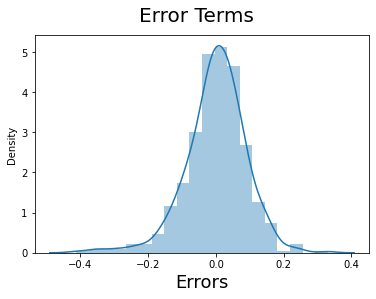

In [91]:
# Check for error term normal distribution
# Plot the histogram of the error terms
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation:
    The residuals error terms seems normally distributed and hence the assumptions for linear regression is not violated i.e. the error terms should be normally distributed with mean equal to 0

In [92]:
# R-squared for TRAIN
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
r2.round(4)

0.8389

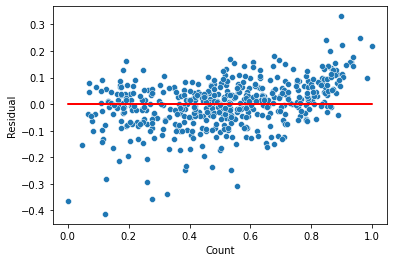

In [93]:
# check for Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Observation: 
The plot for residuals shows no visible pattern.The error terms just appear to be evenly distributed noise around zero which is ideal.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Fifth model (lm_5).

#### Applying the scaling on the test sets

In [94]:
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           1  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           1  29.315000  32.19710  30.5000  19.583229  4968   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         0         1  ...        0        0          1          0   
535         1         0  ...        0        0          0          0   
299         0         0  ...        0        0          0          0   
221         0         1  ...        0        0          0          0   
152         1         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          0          0          0          0             1             0  
535          1          0          0          0             0             0  
299          0          1          0          0             1             0  
221          1          0          0          0             0             0  
152          0          1          0          0             0             0  

[5 rows x 30 columns]

In [95]:
# Apply the min-max scaler on the numerical variables in the test dataset.
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [96]:
# Display the scaled test data set
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
184  0.692706         0         1  ...        0        0          1   
535  0.712034         1         0  ...        0        0          0   
299  0.303382         0         0  ...        0        0          0   
221  0.547400         0         1  ...        0        0          0   
152  0.569029         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          0          0          0          0             1   
535          0          1          0          0          0             0   
299          0          0          1          0          0             1   
221          0          1          0          0          0             0   
152          0          0          1          0          0             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  

[5 rows x 30 columns]

In [97]:
# Describe the scaled test data set
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.264840    0.246575  ...    0.073059   
std      0.159947    0.218435    0.442259    0.432005  ...    0.260830   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    1.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.127854    0.164384    0.100457    0.164384    0.178082   
std      0.282125    0.334692    0.371472    0.301297    0.371472    0.383458   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.118721      0.319635      0.027397  
std      0.324202      0.467403      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

#### Dividing into X_test and y_test

In [98]:
# Dividing the data, removes the cnt variable from X_test
df_test_v1 = df_test
y_test = df_test_v1.pop('cnt')
X_test = df_test_v1

In [99]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [100]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [101]:
X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
184         0         1         0  ...        0        0          1   
535         1         0         0  ...        0        0          0   
299         0         0         1  ...        0        0          0   
221         0         1         0  ...        0        0          0   
152         1         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          0          0          0          0             1   
535          0          1          0          0          0             0   
299          0          0          1          0          0             1   
221          0          1          0          0          0             0   
152          0          0          1          0          0             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  

[5 rows x 29 columns]

In [102]:
X_train_rfe_5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [103]:
# Creating test dataframe by including columns used in the final model lm_5
#(i.e. columns used in  X_train_rfe_5 dataset)

col_1 = X_train_rfe_5.columns
X_test = X_test[col_1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)
X_test_lm_5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_8        219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [104]:
# Making predictions using the Fourth model (lm_4)

y_pred = lm_5.predict(X_test_lm_5)

In [105]:
y_pred.head()

184    0.417802
535    0.914824
299    0.407217
221    0.594983
152    0.580003
dtype: float64

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

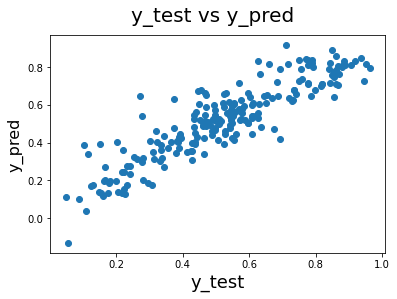

In [106]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

We can see that the equation of our best fitted line is represented by:

cnt = 0.0813 + 02328 <b>yr</b> + 0.0548 <b>workingday</b> + 0.5209 <b>temp</b> - 0.1518 <b>windspeed</b> + 0.0998 <b>season_2</b> + 0.01391 <b>season_4</b> + 0.0512 <b>mnth_8</b> + 0.1116 <b>mnth_9</b> + 0.0655 <b>weekday_6</b> - 0.0839 <b>weathersit_2</b> - 0.2869 <b>weathersit_3</b>

### NOTE:

	- yr : year
    - workingday : working day
    - temp : temperature in Celsius
    - windspeed: wind speed
    - season_2 : summer
    - season_4 : winter
	- mnth_8 : month 8 (August)
    - mnth_9 : month 9 (September)
	- holiday : weather day is a holiday or not (extracted from 
	- weekday_6 : Saturday
	- weathersit_2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		

### R-squared for TEST

In [107]:
# R-squared for TEST
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7968000385944227

##### Adjusted R-squared for TEST

In [108]:
X_test.shape

(219, 11)

In [109]:
# n is number of samples (rows) in X
n = X_test.shape[0]

# p is the number of predictors
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.7860019730124839

### Modelling vs Prediction results on Train and Test data sets

* Train R-Squared:`0.839`
* Train Adjusted R-Squared:`0.835`
* Test R-Squared:`0.797`
* Test Adjusted R-Squared:`0.786`

`lm_5` seems like a good model with various datasets

In [110]:
X_test.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

## FINAL EVALUATION:

Based on the coefficient values of our final model (lm_5), the top 3 predictor variables that influences the bike bookings are:

* `Temperature (temp)` -  unit increase in temp variable could increase bike bookings by 0.5209 units. 

* `Weather Situation 3 (weathersit_3)` -  a unit increase in Weathersit3 variable could decrease bike bookings by 0.2869 units. 

* `Year (yr)` - a unit increase in yr variable could increase bike bookings by 0.2328 units. 


In addition, the following variables also influence the demand in the order specified:
  
* `windspeed`: a unit increase in windspeed variable could decrease bike bookings by 0.1518 units. 
* `season 4 (season_4)`: a unit increase in season_4 variable could increase bike bookings by 0.1381 units.
* `month 9 (mnth_9)`: a unit increase in mnth_9 variable could increase bike bookings by 0.1116 units.  

#### NOTE:

- temp : temperature in Celsius
- weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- yr : year
- windspeed: wind speed
- season_4 : winter
- mnth_9 : September
    